# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $74500.80
The current value of your 5.3 ETH is $24199.48


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
    )

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
investment_portfolio = alpaca.get_barset(tickers, timeframe, end=today, limit=1000).df.sort_index(ascending=False)

# Preview DataFrame
investment_portfolio.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-06-25 00:00:00-04:00  115.11  115.130  114.7516  114.89  3987588  425.90   
2021-06-24 00:00:00-04:00  115.10  115.170  115.0450  115.07  6672880  424.89   
2021-06-23 00:00:00-04:00  115.06  115.138  114.9900  115.05  5000374  423.19   
2021-06-22 00:00:00-04:00  114.83  115.140  114.8300  115.11  5299846  420.85   
2021-06-21 00:00:00-04:00  115.06  115.120  114.9210  114.96  4934966  416.80   

                                                               
                               high     low   close    volume  
time                                                           
2021-06-25 00:00:00-04:00  427.0943  425.55  426.57  50460394  
2021-06-24 00:00:00-04:00  425.5500  424.62  425.09  39863529  
2021-06-23 00:00:00-04:00  424.0500  422.51  422.60  41476351  
2021-06-22 00:00:00-04:00  424.0000  420.08  423.06  50857233  
2021-06-21 00:00:00-04:00  421.0600  415.93  420.85  63727942

In [9]:
# Pick AGG close prices
agg_close_price = investment_portfolio["AGG"]["close"][0]
agg_close_price

114.89

In [10]:
# Pick SPY close prices
spy_close_price = investment_portfolio["SPY"]["close"][0]
spy_close_price

426.57

In [11]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.89
Current SPY closing price: $426.57


In [12]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21328.50
The current value of your 200 AGG shares is $22978.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# Consolidate crypto holdings
crypto = my_btc_value + my_eth_value

# Consolidate equity holdings
shares = my_agg_value + my_spy_value

# Create list for creation of savings DataFrame
savings = [crypto, shares]

# Create savings DataFrame
df_savings = pd.DataFrame(savings, index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,98700.282
shares,44306.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

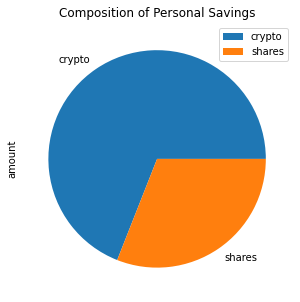

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", figsize=(10,5), title="Composition of Personal Savings")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have EXCEEDED your emergency savings threshold goal!")
elif total_savings == emergency_fund:
    print("Congratulations! You have EXACTED your emergency savings threshold goal!")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your emergency savings threshold goal. Keep going!")

Congratulations! You have EXCEEDED your emergency savings threshold goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-11-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-05', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high      low   close     volume    open   
time                                                                            
2017-11-15 00:00:00-05:00  109.26  109.38  109.140  109.33  1959296.0     NaN   
2017-11-16 00:00:00-05:00  109.22  109.32  109.175  109.18  1754309.0  257.52   
2017-11-17 00:00:00-05:00  109.33  109.39  109.260  109.32  1779593.0  258.22   
2017-11-20 00:00:00-05:00  109.23  109.30  109.180  109.25  2383640.0  258.14   
2017-11-21 00:00:00-05:00  109.39  109.43  109.222  109.34  1939152.0  259.18   

                                                                   
                              high       low    close      volume  
time                                                               
2017-11-15 00:00:00-05:00      NaN       NaN      NaN         NaN  
2017-11-16 00:00:00-05:00  259.040  257.4748  258.609  51840766.0  
2017-11-17 00:00:00-05:00  258.440  257.7700  257.890  42081169.0  
2017-11-20 00:00:00-05:00  258.525  257.8600  258.290  29587185.0  
2017-11-21 00:00:00-05:00  260.200  259.0900  259.960  43517856.0

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40, .60],
    num_simulation=500,
    num_trading_days=252*30
)

In [19]:
# Printing the simulation input data
MC_30yr.portfolio_data.head()

AGG                                      \
                             open    high      low   close     volume   
time                                                                    
2017-11-15 00:00:00-05:00  109.26  109.38  109.140  109.33  1959296.0   
2017-11-16 00:00:00-05:00  109.22  109.32  109.175  109.18  1754309.0   
2017-11-17 00:00:00-05:00  109.33  109.39  109.260  109.32  1779593.0   
2017-11-20 00:00:00-05:00  109.23  109.30  109.180  109.25  2383640.0   
2017-11-21 00:00:00-05:00  109.39  109.43  109.222  109.34  1939152.0   

                                           SPY                              \
                          daily_return    open     high       low    close   
time                                                                         
2017-11-15 00:00:00-05:00          NaN     NaN      NaN       NaN      NaN   
2017-11-16 00:00:00-05:00    -0.001372  257.52  259.040  257.4748  258.609   
2017-11-17 00:00:00-05:00     0.001282  258.22  258.440  257.7700  257.890   
2017-11-20 00:00:00-05:00    -0.000640  258.14  258.525  257.8600  258.290   
2017-11-21 00:00:00-05:00     0.000824  259.18  260.200  259.0900  259.960   

                                                    
                               volume daily_return  
time                                                
2017-11-15 00:00:00-05:00         NaN          NaN  
2017-11-16 00:00:00-05:00  51840766.0          NaN  
2017-11-17 00:00:00-05:00  42081169.0    -0.002780  
2017-11-20 00:00:00-05:00  29587185.0     0.001551  
2017-11-21 00:00:00-05:00  43517856.0     0.006466

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995210,0.996889,0.999595,0.994392,0.992782,1.012874,1.001171,1.003519,1.015774,0.998385,...,0.991450,1.007578,1.000644,1.000769,1.002221,0.982509,0.995015,0.990045,0.987101,0.989667
2,0.985325,0.991245,1.011398,0.994755,0.997276,1.019173,1.004907,0.993322,1.011672,0.992955,...,0.981688,1.002879,1.007717,0.990304,0.988839,0.985120,0.999644,0.999532,0.992730,0.979837
3,0.983994,0.987528,1.011969,1.007422,1.006311,1.016152,1.004514,1.001605,1.024546,0.998417,...,0.976558,1.001129,1.016433,0.980637,0.983051,0.977530,0.997773,1.004968,0.998303,0.968805
4,0.976184,0.983622,1.014258,1.002557,1.018479,1.022357,1.014829,0.996632,1.027413,0.986280,...,0.982039,1.014265,1.008496,0.981126,0.993418,0.974365,1.027962,1.011282,0.985627,0.966035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,24.112728,20.524039,31.884307,51.513859,23.985360,32.383811,40.440665,3.607301,46.929797,37.214845,...,19.325875,23.126791,15.583588,9.930753,32.016015,15.412266,48.783529,19.239856,56.543869,13.939619
7557,24.137343,20.409851,31.754428,50.919981,23.817031,32.260896,40.648284,3.603107,46.104577,37.283169,...,19.490513,23.093770,15.585983,9.899509,32.000729,15.237311,48.510188,19.103467,56.012420,13.983146
7558,24.320220,20.452890,31.369599,51.490296,23.829930,32.552181,40.795820,3.571501,45.696630,37.550377,...,19.461491,22.674654,15.819584,9.952367,32.329033,15.289224,48.749555,19.039970,56.612680,14.004550
7559,24.471067,20.232627,31.263517,51.524649,23.677411,32.860893,40.449248,3.571153,45.804786,37.476729,...,19.422413,22.801597,15.821698,9.944854,32.353919,15.432217,48.090699,18.944096,56.762220,13.980165


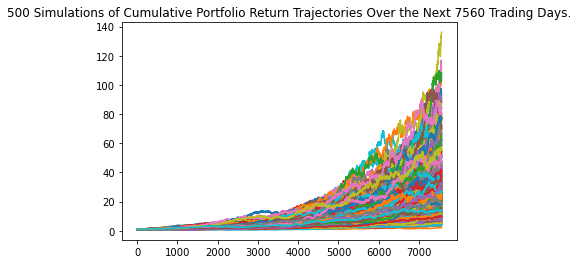

In [21]:
# Plot simulation outcomes
line_plot_30yr = MC_30yr.plot_simulation()

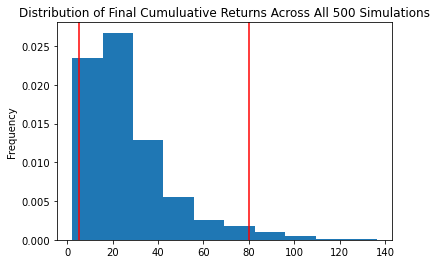

In [22]:
# Plot probability distribution and confidence intervals
distribution_plot_30yr = MC_30yr.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_30yr.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             26.916213
std              19.491304
min               2.217334
25%              14.002416
50%              21.485878
75%              34.302851
max             136.148876
95% CI Lower      5.264272
95% CI Upper     79.963361
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((summary_stats[8] * initial_investment), 2)
ci_upper = round((summary_stats[9] * initial_investment), 2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment}"
      f" in the portfolio over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $105285.43 and $1599267.22


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round((summary_stats[8] * initial_investment), 2)
ci_upper = round((summary_stats[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $157928.15 and $2398900.83


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252 * 5
    )

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999525,0.990853,0.998715,0.977273,0.982468,1.015081,0.992442,0.987301,0.997253,1.005913,...,1.025346,0.976259,1.013997,0.998553,1.004209,0.996644,1.010599,1.014711,1.001463,1.012754
2,1.010727,0.980335,0.987608,0.993260,0.988440,1.014475,1.004471,0.993826,1.003208,1.008352,...,1.017154,0.973237,1.020028,0.993644,0.996166,0.981105,1.021999,1.031251,1.005135,1.033256
3,1.014098,0.977616,0.993576,0.983714,0.982236,1.018428,1.021263,0.980385,1.006226,0.989994,...,1.017216,0.983291,1.031295,0.987145,1.001599,0.987020,1.018302,1.041717,0.992903,1.026945
4,1.014677,0.994227,0.991163,0.966664,0.977989,1.002873,0.996836,0.982224,1.022229,0.999071,...,1.028973,0.989873,1.040397,0.995774,1.010123,0.998708,0.997769,1.045822,0.987026,1.042851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.610786,1.850256,2.397745,1.809693,1.548452,1.110938,1.838312,1.485222,1.874856,2.018230,...,1.598792,3.323822,2.126395,2.060397,1.330482,1.941758,1.337772,1.298138,2.663013,1.687692
1257,1.620332,1.831511,2.421821,1.787671,1.543969,1.119665,1.823496,1.475909,1.846375,2.014083,...,1.558859,3.254143,2.125375,2.087764,1.316523,1.978868,1.338478,1.305580,2.692110,1.739056
1258,1.635538,1.838290,2.398379,1.806832,1.550011,1.121892,1.786100,1.468813,1.862094,2.006837,...,1.562626,3.231647,2.148702,2.085859,1.318917,1.973169,1.330199,1.315430,2.679844,1.755177
1259,1.611704,1.828094,2.396314,1.811663,1.580524,1.125755,1.780859,1.468528,1.869593,1.996944,...,1.559917,3.229791,2.157035,2.068789,1.320967,1.975956,1.318886,1.333394,2.721918,1.757438


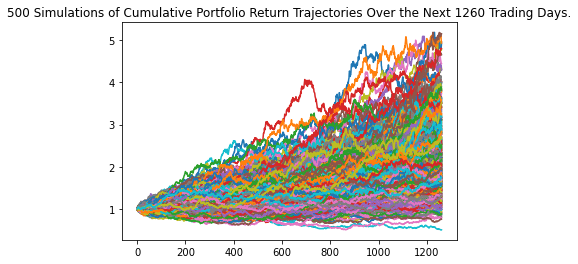

In [28]:
# Plot simulation outcomes
line_plot_5yr = MC_5yr.plot_simulation()

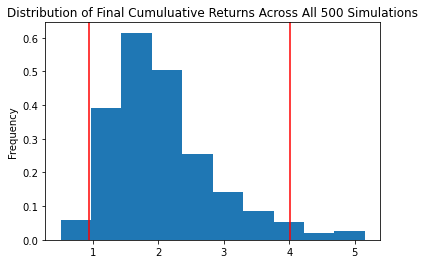

In [29]:
# Plot probability distribution and confidence intervals
distribution_plot_5yr = MC_5yr.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_5yr = MC_5yr.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_5yr)

count           500.000000
mean              2.057478
std               0.805241
min               0.505474
25%               1.532781
50%               1.910412
75%               2.424394
max               5.154586
95% CI Lower      0.942153
95% CI Upper      4.006342
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 70000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round((summary_stats_5yr[8] * initial_investment), 2)
ci_upper_five = round((summary_stats_5yr[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $70000 in the portfolio over the next 5 years will end within in the range of $65950.74 and $280443.97


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.20, .80],
    num_simulation=500,
    num_trading_days=252*10
    )

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003950,0.998669,1.001156,0.989579,0.981864,0.986388,1.017752,0.991441,0.980476,1.021172,...,1.009653,0.997880,0.982432,1.013348,0.998854,1.001229,1.012242,1.004646,1.008257,1.002339
2,1.009640,0.995582,0.984722,0.977333,0.964556,0.984049,1.030099,0.977925,0.977389,1.007939,...,1.013060,0.998752,0.976230,1.005524,0.985141,0.998368,1.013113,1.006882,0.994632,1.015210
3,1.004278,0.996507,0.991949,0.990286,0.965422,0.987626,1.037353,0.961385,0.973808,0.977359,...,1.032488,1.001392,0.971145,1.027319,0.989088,1.000580,1.002954,0.999976,0.986710,1.006625
4,1.024791,0.994047,0.987700,0.997811,0.972609,0.984282,1.048440,0.954996,0.962797,0.969643,...,1.037163,1.013430,0.961353,1.039363,0.992183,0.997683,1.012396,0.999160,0.980796,0.983158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.678871,4.127376,5.137941,7.548347,3.000044,5.700026,2.639101,1.745076,4.635817,1.823792,...,2.973291,1.622816,2.041144,9.014433,5.003293,1.900853,2.388639,2.661935,6.071984,2.603179
2517,7.653696,4.117509,5.203736,7.600550,3.059935,5.509578,2.612698,1.734560,4.607994,1.829463,...,2.985237,1.585353,2.060618,9.034054,5.014663,1.896639,2.383536,2.694622,6.149228,2.593402
2518,7.748181,4.161894,5.228653,7.685337,3.099064,5.512876,2.638732,1.738044,4.649472,1.840301,...,2.963970,1.580282,2.027304,8.950808,5.048534,1.908670,2.389358,2.626471,6.096177,2.572367
2519,7.750927,4.096280,5.232492,7.704260,3.142032,5.522209,2.620339,1.764995,4.667862,1.831093,...,2.997025,1.572075,2.036615,9.018581,5.043207,1.909526,2.399264,2.594744,6.168477,2.628861


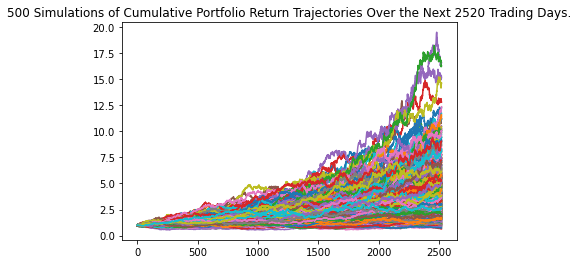

In [34]:
# Plot simulation outcomes
line_plot_10yr = MC_10yr.plot_simulation()

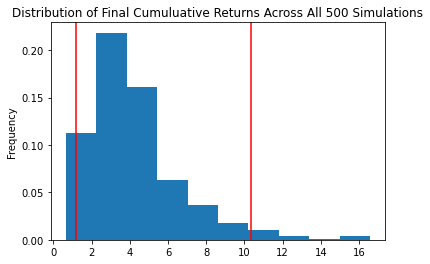

In [35]:
# Plot probability distribution and confidence intervals
distribution_plot_10yr = MC_10yr.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_10yr = MC_10yr.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_10yr)

count           500.000000
mean              4.175923
std               2.423202
min               0.647807
25%               2.510178
50%               3.681369
75%               5.051751
max              16.585267
95% CI Lower      1.157610
95% CI Upper     10.368199
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment = 70000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round((summary_stats_10yr[8] * initial_investment), 2)
ci_upper_ten = round((summary_stats_10yr[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $70000 in the portfolio over the next 10 years will end within in the range of $81032.7 and $725773.93
